In [4]:
import keras
from keras.models import Sequential
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers import Dense, Dropout , Flatten
from keras.optimizers import Adam
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import pickle
import pandas as pd
import numpy as np
import random

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [5]:
!git clone https://bitbucket.org/jadslim/german-traffic-signs

fatal: destination path 'german-traffic-signs' already exists and is not an empty directory.


In [7]:
data = pd.read_csv('german-traffic-signs/signnames.csv')

In [8]:
with open("german-traffic-signs/train.p",mode ='rb') as training:
  train = pickle.load(training)
with open("german-traffic-signs/valid.p",mode ='rb') as validation:
  valid = pickle.load(validation)
with open("german-traffic-signs/test.p",mode ='rb') as testing:
  test = pickle.load(testing)  

In [9]:
x_train, y_train = train['features'], train['labels']
x_validation, y_validation = valid['features'], valid['labels']
x_test, y_test = test['features'], test['labels']

image label=5


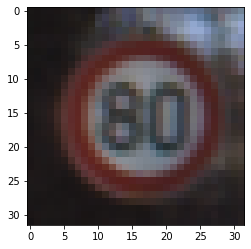

In [10]:
index= np.random.randint(1,len(x_train))
plt.imshow(x_train[index])
print("image label={}".format(y_train[index]))

In [11]:
from sklearn.utils import shuffle
x_train, y_train = shuffle(x_train,y_train)

In [12]:
def preprocessing(img):
  img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
  img = cv2.equalizeHist(img)
  img = img/255
  return img

In [13]:
x_train_processed = np.array(list(map(preprocessing,x_train)))
x_validation_processed = np.array(list(map(preprocessing,x_validation)))
x_test_processed = np.array(list(map(preprocessing,x_test)))

In [14]:
x_train_processed = x_train_processed.reshape(34799,32,32,1)
x_test_processed = x_test_processed.reshape(12630,32,32,1)
x_validation_processed = x_validation_processed.reshape(4410,32,32,1)


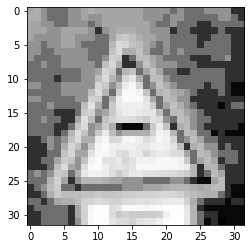

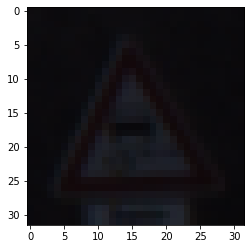

In [15]:
i= random.randint(1,len(x_train))
plt.imshow(x_train_processed[i].squeeze(),cmap='gray')
plt.figure()
plt.imshow(x_train[i].squeeze())

In [16]:
model = Sequential()
model.add(Conv2D(32,(5,5),activation='relu',input_shape=(32,32,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Conv2D(64,(5,5),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(43,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        832       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 10, 10, 64)        51264     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0         
_________________________________________________________________
dense (Dense)                (None, 256)               4

In [17]:
model.compile(Adam(lr=0.0001),loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [18]:
history = model.fit(x_train_processed,y_train,batch_size=500,epochs=50,verbose=1,validation_data=(x_validation_processed,y_validation))

Epoch 1/50
70/70 [==============================] - 1s 16ms/step - loss: 3.5584 - accuracy: 0.0611 - val_loss: 3.4754 - val_accuracy: 0.1771
Epoch 2/50
70/70 [==============================] - 1s 12ms/step - loss: 3.3073 - accuracy: 0.1465 - val_loss: 3.1144 - val_accuracy: 0.3023
Epoch 3/50
70/70 [==============================] - 1s 12ms/step - loss: 2.7862 - accuracy: 0.3066 - val_loss: 2.4716 - val_accuracy: 0.4329
Epoch 4/50
70/70 [==============================] - 1s 12ms/step - loss: 2.2777 - accuracy: 0.4047 - val_loss: 2.0037 - val_accuracy: 0.4855
Epoch 5/50
70/70 [==============================] - 1s 13ms/step - loss: 1.9247 - accuracy: 0.4727 - val_loss: 1.6682 - val_accuracy: 0.5551
Epoch 6/50
70/70 [==============================] - 1s 12ms/step - loss: 1.6750 - accuracy: 0.5240 - val_loss: 1.4104 - val_accuracy: 0.6179
Epoch 7/50
70/70 [==============================] - 1s 12ms/step - loss: 1.4747 - accuracy: 0.5710 - val_loss: 1.2157 - val_accuracy: 0.6868
Epoch 8/50
70

In [19]:
score = model.evaluate(x_test_processed,y_test)

395/395 [==============================] - 1s 2ms/step - loss: 0.3329 - accuracy: 0.9086


In [20]:
prediction = model.predict_classes(x_test_processed)
y_true_label = y_test

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


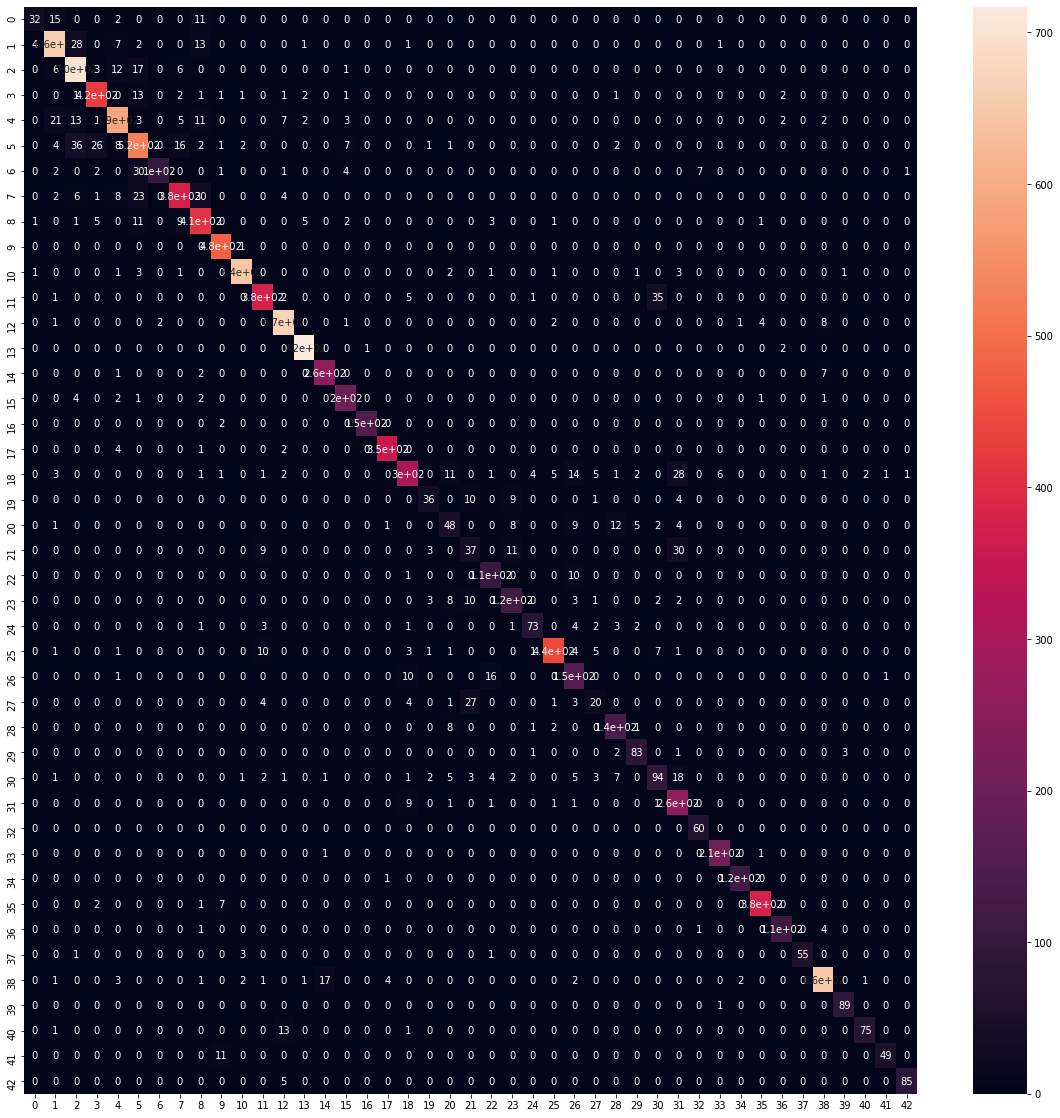

In [27]:
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(y_true_label,prediction)
plt.figure(figsize=(20,20))
sns.heatmap(matrix,annot=True)

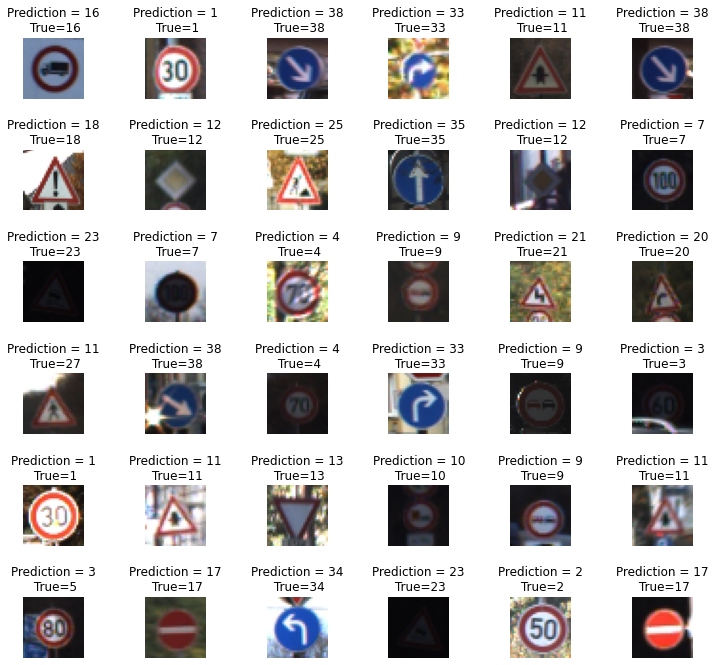

In [31]:
L=6
W=6
fig , axes = plt.subplots(L,W,figsize=(12,12))
axes = axes.ravel()
for i in range(0,L*W):
  axes[i].imshow(x_test[i])
  axes[i].set_title('Prediction = {}\n True={}'.format(prediction[i],y_true_label[i]))
  axes[i].axis('off')
  plt.subplots_adjust(wspace=1)